<a href="https://colab.research.google.com/github/Lusca3006/Analise-Bancaria/blob/main/Analise_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 1. IMPORTANDO BIBLIOTECAS

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 2. CARREGANDO OS DADOS

In [ ]:
# Carregar a base de dados

df = pd.read_excel("/content/drive/MyDrive/Analise_banco/bank_marketing.xlsx")

# 📌 3. TRATAMENTO DOS DADOS

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
1,NaN,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
2,NaN,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
3,NaN,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
4,NaN,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685 entries, 0 to 9684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9685 non-null   object 
 2   Unnamed: 2   9685 non-null   object 
 3   Unnamed: 3   9685 non-null   object 
 4   Unnamed: 4   9685 non-null   object 
 5   Unnamed: 5   9685 non-null   object 
 6   Unnamed: 6   9685 non-null   object 
 7   Unnamed: 7   9685 non-null   object 
 8   Unnamed: 8   9685 non-null   object 
 9   Unnamed: 9   9685 non-null   object 
 10  Unnamed: 10  9685 non-null   object 
dtypes: float64(1), object(10)
memory usage: 832.4+ KB


In [ ]:
# Remover colunas vazias

df = df.dropna(axis=1, how="all")

In [ ]:
# Renomear colunas para facilitar a análise

df.columns = ["Cliente_Comprou_Titulo", "Idade", "Profissão", "Estado_Civil", "Formação",
              "Cliente_Devedor", "Saldo_Conta_Corrente", "Tem_Hipoteca", "Tem_Emprestimo",
              "Qte_de_Ligacoes_Feitas"]

In [ ]:
# Remover a primeira linha

df = df.iloc[1:].reset_index(drop=True)

In [ ]:
# Remover valores duplicados

df = df.drop_duplicates()

In [ ]:
# Converter colunas numéricas para o tipo correto
colunas_numericas = ["Idade", "Saldo_Conta_Corrente", "Qte_de_Ligacoes_Feitas"]
for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors="coerce")  # Converter e tratar erros

In [ ]:
# Tratar valores ausentes

df = df.fillna({"Idade": df["Idade"].median(),  # Substitui idade vazia pela mediana
                "Saldo_Conta_Corrente": df["Saldo_Conta_Corrente"].mean(),  # Substitui saldo pela média
                "Qte_de_Ligacoes_Feitas": df["Qte_de_Ligacoes_Feitas"].median()})  # Substitui ligações pela mediana

In [ ]:
# Converter colunas categóricas para numéricas usando Label Encoding

colunas_categoricas = ["Profissão", "Estado_Civil", "Formação", "Cliente_Devedor"]
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].astype("category").cat.codes  # Converte strings para números


In [ ]:
# Criar novas colunas úteis

df["Possui_Empréstimo"] = df["Tem_Emprestimo"].apply(lambda x: "Sim" if x == "1" else "Não")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9406 entries, 0 to 9683
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cliente_Comprou_Titulo  9406 non-null   object
 1   Idade                   9406 non-null   int64 
 2   Profissão               9406 non-null   int8  
 3   Estado_Civil            9406 non-null   int8  
 4   Formação                9406 non-null   int8  
 5   Cliente_Devedor         9406 non-null   int8  
 6   Saldo_Conta_Corrente    9406 non-null   int64 
 7   Tem_Hipoteca            9406 non-null   object
 8   Tem_Emprestimo          9406 non-null   object
 9   Qte_de_Ligacoes_Feitas  9406 non-null   int64 
 10  Possui_Empréstimo       9406 non-null   object
dtypes: int64(3), int8(4), object(4)
memory usage: 624.6+ KB


In [ ]:
df.head()

,Cliente_Comprou_Titulo,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor,Saldo_Conta_Corrente,Tem_Hipoteca,Tem_Emprestimo,Qte_de_Ligacoes_Feitas,Possui_Empréstimo
0,Não,33,8,0,1,0,263,Sim,Não,3,Não
1,Não,58,1,0,1,0,19,Não,Sim,3,Não
2,Sim,83,1,0,3,0,425,Não,Não,1,Não
3,Sim,32,0,2,2,0,10281,Não,Não,1,Não
4,Sim,31,0,2,1,0,360,Sim,Não,1,Não


In [ ]:
df.to_csv('planilha_tratada.csv', index=False)

# 📌 4. Análise Exploratória de Dados (EDA)

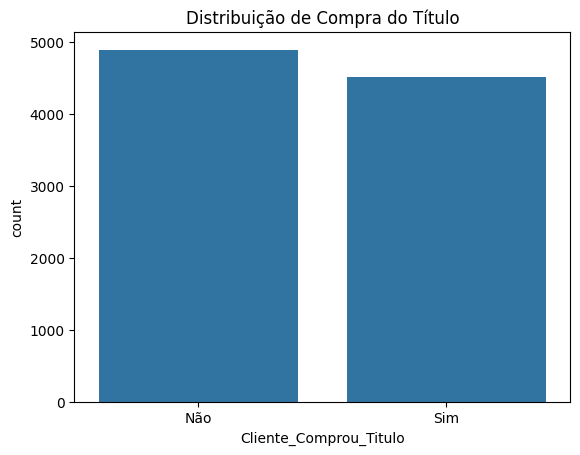

In [ ]:
# Distribuição dos clientes

sns.countplot(data=df, x="Cliente_Comprou_Titulo")
plt.title("Distribuição de Compra do Título")
plt.show()

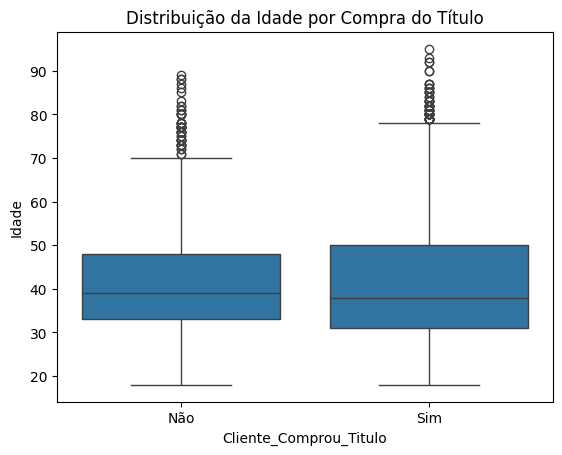

In [ ]:
# Idade x Compra do Título

sns.boxplot(data=df, x="Cliente_Comprou_Titulo", y="Idade")
plt.title("Distribuição da Idade por Compra do Título")
plt.show()

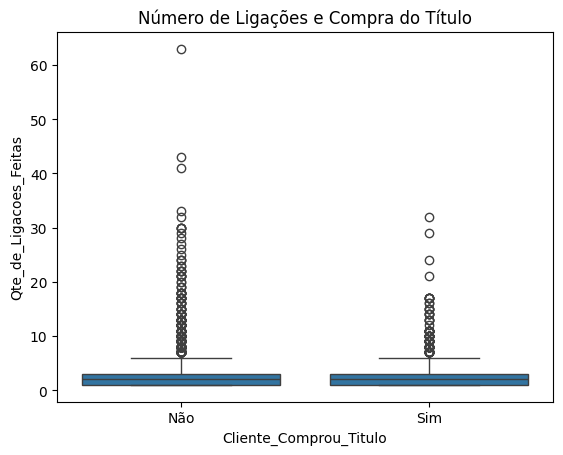

In [ ]:
# Número de ligações x Compra do Título

sns.boxplot(data=df, x="Cliente_Comprou_Titulo", y="Qte_de_Ligacoes_Feitas")
plt.title("Número de Ligações e Compra do Título")
plt.show()

In [ ]:
# Convertendo colunas "Sim" e "Não" para 1 e 0
mapeamento = {"Sim": 1, "Não": 0}
df.replace(mapeamento, inplace=True)

<ipython-input-45-a8fce405e4ca>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeamento, inplace=True)


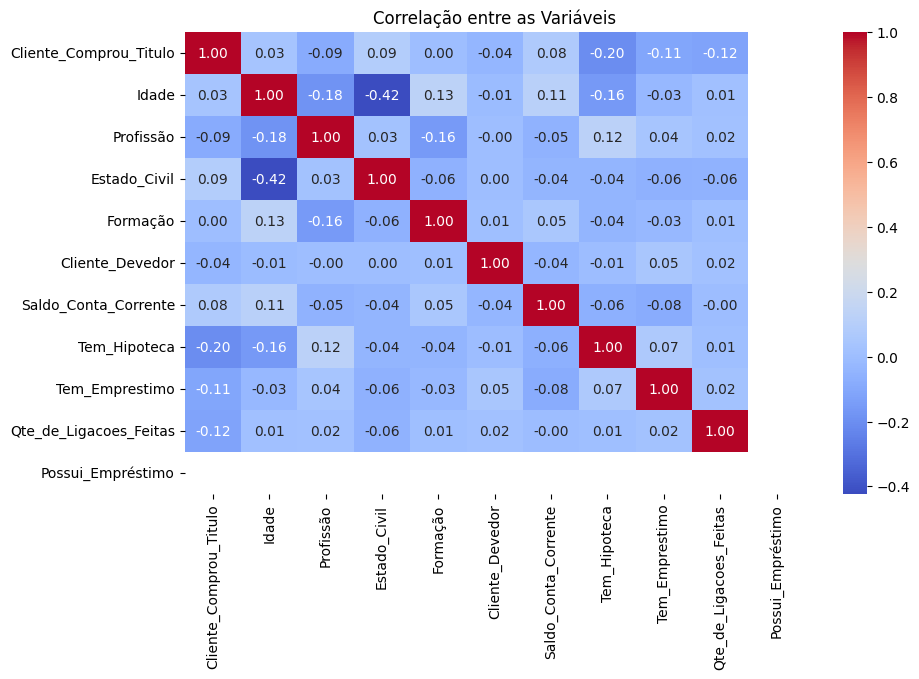

In [ ]:

# Correlação entre variáveis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as Variáveis")
plt.show()

# 📌 5. Clusterização dos Clientes (Segmentação de Mercado)

In [ ]:
# Padronizar os dados numéricos

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["Idade", "Saldo_Conta_Corrente", "Qte_de_Ligacoes_Feitas"]])

In [ ]:
# Aplicar K-Means para agrupar os clientes

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

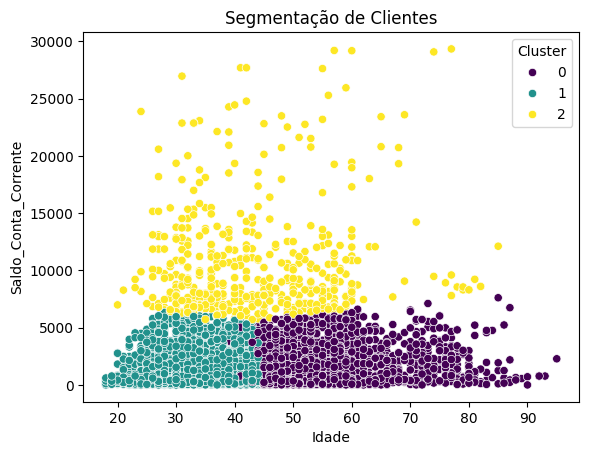

In [ ]:
# Visualizar os clusters

sns.scatterplot(x=df["Idade"], y=df["Saldo_Conta_Corrente"], hue=df["Cluster"], palette="viridis")
plt.title("Segmentação de Clientes")
plt.show()

# 📌 6. Modelo de Machine Learning para Predição

In [ ]:
# Converter variáveis categóricas em números

le = LabelEncoder()
categorical_cols = ["Profissão", "Estado_Civil", "Formação", "Cliente_Devedor", "Tem_Hipoteca", "Tem_Emprestimo"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Separar variáveis independentes e dependentes

X = df.drop(columns=["Cliente_Comprou_Titulo"])
y = df["Cliente_Comprou_Titulo"]

In [ ]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar e treinar o modelo

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Acurácia: 0.6078639744952179
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1009
           1       0.58      0.55      0.57       873

    accuracy                           0.61      1882
   macro avg       0.61      0.60      0.60      1882
weighted avg       0.61      0.61      0.61      1882



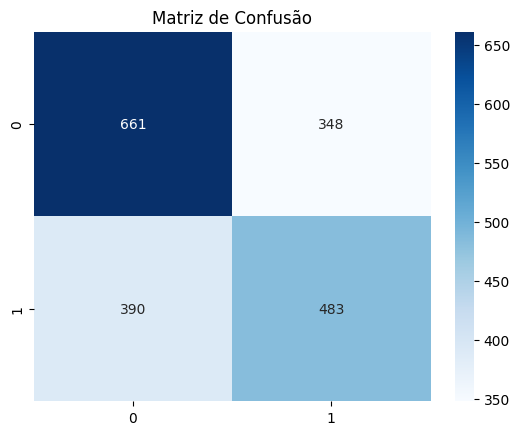

In [ ]:
# Fazer previsões e avaliar o modelo

y_pred = modelo.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()